In [1]:
using Plots
using LaTeXStrings
using QuadGK
using LinearAlgebra

# Report 05

# Exercice I

a)

We have the function

$$ u(x) = \int_{0}^{1} K(x,y) f(y)dy $$

with

$$ K(x, y)= \begin{cases}

y(1-x) / T & \text { if } y \in[0, x] \\ 
x(1-y) / T & \text { if } y \in(x, 1]

\end{cases} $$

Also:

$$ K_x(x,y) =  
\begin{cases}
-y / T & \text{ if } y \in[0,x] \\
(1-y) / T & \text{ if } y \in(x,1]
\end{cases}

$$

$$ K_{xx}(x,y) = 0 $$

Therefore we have

$$ u(x) = \int_{0}^{x} K(x,y) f(y)dy + \int_{x}^{1} K(x,y) f(y)dy$$

The Leibniz's rule is:

$$
\frac{d}{d x}\left(\int_{a(x)}^{b(x)} f(x, t) d t\right)=f(x, b(x)) \cdot \frac{d}{d x} b(x)-f(x, a(x)) \cdot \frac{d}{d x} a(x)+\int_{a(x)}^{b(x)} \frac{\partial}{\partial x} f(x, t) d t
$$

We have that

$$ u^{\prime}(x) = \frac{x(1-x)}{T}f(x) + 0 + 0 -  \frac{x(1-x)}{T}f(x) + \int_{0}^{x}K_x(x,y)f(y)dy + \int_{x}^{1}K_x(x,y)f(y)dy$$

$$ u^{\prime \prime}(x) = \frac{-xf(x)}{T} - \frac{(1-x)f(x)}{T} + \int_{0}^{x}K_{xx}(x,y)f(y)dy + \int_{x}^{1}K_{xx}(x,y)f(y)dy $$

Therefore

$$ Tu^{\prime \prime}(x) + f(x) = 0$$

We notice that

$$ u(0) = \int_{0}^{0} K(x,y) f(y)dy + \int_{0}^{1} K(x,y) f(y)dy = \int_{0}^{1} \frac{0*(1-y)}{T} = 0$$
$$ u(1) = \int_{0}^{1} K(x,y) f(y)dy + \int_{1}^{1} K(x,y) f(y)dy = \int_{0}^{1} \frac{y*(1-1)}{T} = 0$$

b.1) Difference in $L^2$ norm

$$ u(x) = (x-1)sin(x) $$

With pertubed function

$$ u_{\delta}(x) = (x-1)sin(x) + \delta(x-1)sin(x/\delta) $$

$$ u_{\delta}^{\prime}(x) = cos(x)(x-1) + sin(x) + (x-1)cos(x/\delta) + \delta sin(x/\delta)$$

$$ u_{\delta}^{\prime \prime}(x) = 2cos(x) + 2cos(x/\delta) - [sin(x)(x-1) + \frac{1}{\delta} sin(x/\delta)(x-1)]$$

And

$$ u^{\prime \prime}(x) = -sin(x)(x-1) + 2cos(x) $$

In [2]:
x = range(0,1,100)      ### Domain

function u(x)
    return (x-1) * sin(x)    
end

function uδ(x,δ)
    return (x-1) * sin(x) + δ * (x-1) * sin( x/ δ)
end

function f(x,T)
    return - T *( 2 * cos(x) - sin(x) * (1-x) )
end

function fδ(x,T,δ)
    return - T * (2*cos(x) + 2*cos(x/δ) - (sin(x)*(x-1) + sin(x/δ)*(x-1)/δ))
end

fδ (generic function with 1 method)

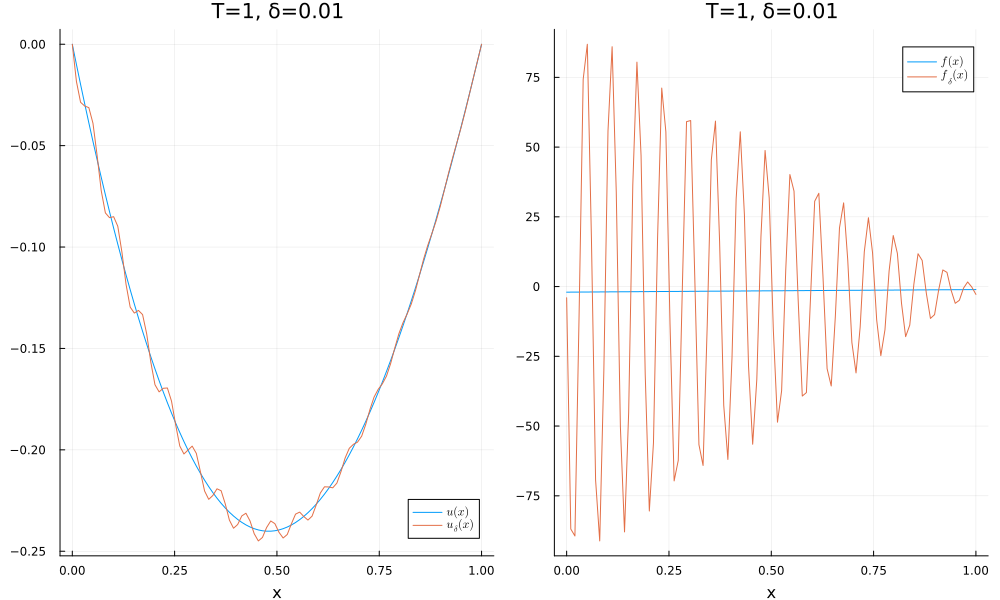

In [3]:
δ = .01       ### Pertubation Parameter
T = 1         ### Tension

p1 = plot(x,u.(x),label=L"u(x)")
plot!(x,uδ.(x,δ),label=L"u_{\delta}(x)")

p2 = plot(x,f.(x,T),label=L"f(x)")
plot!(x,fδ.(x,T,δ),label = L"f_{\delta}(x)")

plot(p1,p2, layout = (1,2), size = (1000,600))
title!("T=$(T), δ=$(δ)")
xlabel!("x")

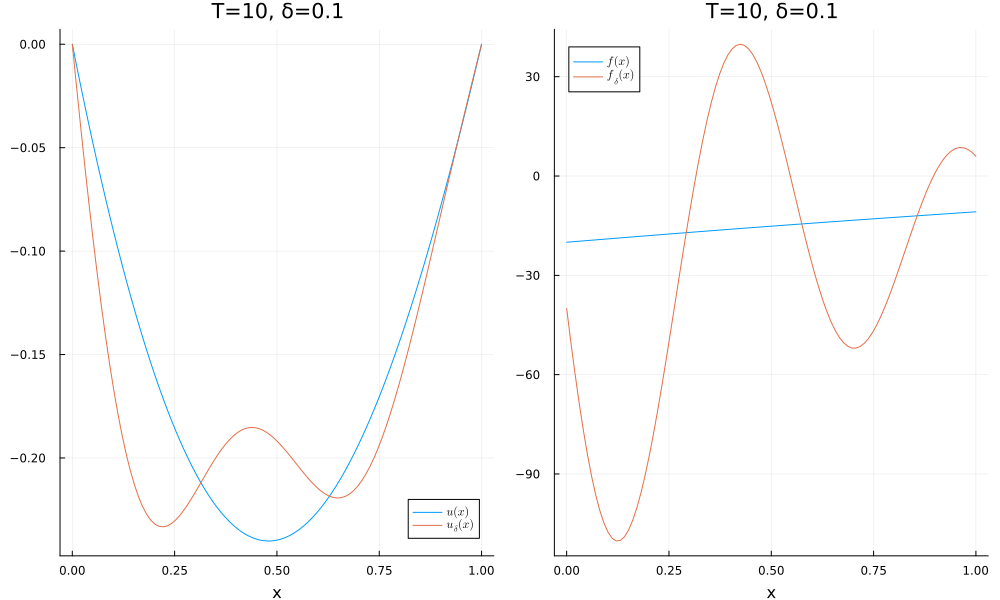

In [4]:
δ = 10^-1       ### Pertubation Parameter
T = 10          ### Tension

p1 = plot(x,u.(x),label=L"u(x)")
plot!(x,uδ.(x,δ),label=L"u_{\delta}(x)")

p2 = plot(x,f.(x,T),label=L"f(x)")
plot!(x,fδ.(x,T,δ),label = L"f_{\delta}(x)")

plot(p1,p2, layout = (1,2), size = (1000,600))
title!("T=$(T), δ=$(δ)")
xlabel!("x")

We have that

$$ || u - u_{\delta} ||_{L^2}^2 = \int_0^{1}|u-u_{\delta}|^2dx = \int_0^1 \delta^2 (x-1)^2 sin^2(x/\delta)dx$$

$$ \int_0^1 \delta^2 (x-1)^2 sin^2(x/\delta)dx = \int_0^1 \delta^2 (x-1)^2 (\frac{1-cos(2x/\delta)}{2})dx$$ 

Making calculations we have that

$$ || u - u_{\delta} ||_{L^2}^2 = \delta^2[\frac{(x-1)^3}{6} - \frac{\delta(x-1)^2}{4}sin(2x/\delta) + \frac{\delta^2 (x-1)}{4}cos(2x/\delta) - \frac{\delta^3}{8}sin(2x/\delta)]_0^1$$

We see that 

$$ || u - u_{\delta} ||_{L^2}^2 \rightarrow 0 \quad \text{if} \quad \delta \rightarrow 0$$

Now, we want to compute

$$ || f - f_{\delta} ||_{L^2}^2 = -T \int_0^1 [2cos(x/\delta) - \frac{1}{\delta}sin(x/\delta)(x-1)]^2 dx = I + II + III$$

$$ I = -T \int_0^1 4cos^2(x/\delta)dx = -2T[x + \frac{\delta}{2}sin(2x/\delta)]_0^1 $$

$$ II = -T\int_0^1 -4\frac{(x-1)}{\delta}cos(x/\delta)sin(x/\delta) = \frac{2T}{\delta}[\frac{sin(2x)}{4} - \frac{cos(2x)}{2}(x-1)]_0^1 $$

$$ III = -T \int_0^1 \frac{1}{\delta^2}sin^2(x/\delta)(x-1)^2 = -\frac{T}{\delta^4}|| u - u_{\delta} ||_{L^2}^2 $$

We see that

$$ I,II,III \rightarrow \infty \quad \text{if} \quad \delta \rightarrow 0 $$

b.2) Difference in $L^{\infty}$ norm

We have that

$$ || u - u_{\delta} ||_{L^{\infty}} = sup_{x \in [0,1]} |\delta(x-1)sin(x/\delta)|  $$

$$ = sup_{x \in [0,1]} \delta(1-x)|sin(x/\delta)| < sup_{x \in [0,1]} \delta(1-x) < \delta$$

We have that

$$ \delta \rightarrow 0 , \quad  || u - u_{\delta} ||_{L^{\infty}} \rightarrow 0$$

Also, we have that

$$ || f - f_\delta ||_{L^{\infty}} = sup_{x\in [0,1]} |2cos(x/\delta - \frac{1}{\delta}sin(x/\delta)(x-1))|$$

$$  = sup| \frac{1}{\delta}sin(x/\delta)(1-x) + 2 cos(x/\delta)| > sup|\frac{1}{\delta}sin(x/\delta)(1-x)| > \frac{1}{\delta}$$

Since $ |sin(x/\delta)(1-x)| < 1$, we have

$$ || f - f_{\delta} ||_{L^{\infty}} \rightarrow \infty, \quad \text{if} ,\quad \delta \rightarrow 0 $$

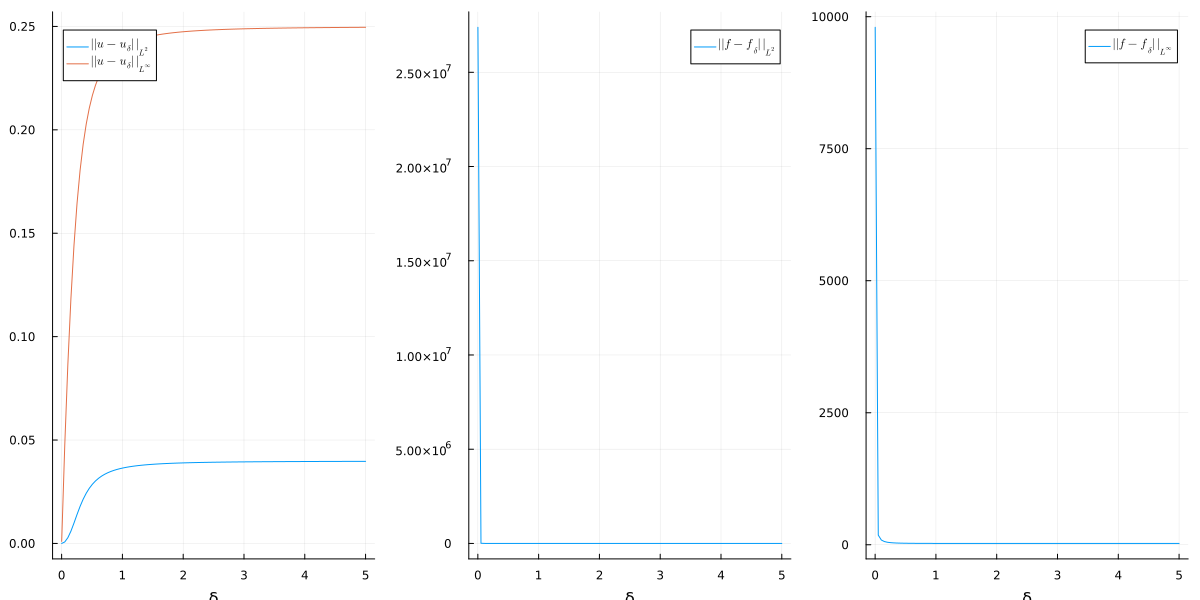

In [5]:
δ_ = range(0.001,5,100)

diff_u_L2(δ) = sqrt(quadgk(x -> abs2(u(x)-uδ(x,δ))^2, 0, 1)[1])
diff_u_Linft(δ) = maximum(u.(range(0,1,1000)).-uδ.(range(0,1,1000),δ))

diff_f_L2(δ) = sqrt(quadgk(x -> abs2(f(x,T)-fδ(x,T,δ))^2, 0, 1)[1])
diff_f_Linft(δ) = maximum(f.(range(0,1,1000),T).-fδ.(range(0,1,1000),T,δ))


plot1 = plot(δ_,diff_u_L2.(δ_),label=L"||u-u_{δ}||_{L^{2}}")
plot!(δ_,diff_u_Linft.(δ_),label=L"||u-u_{δ}||_{L^{∞}}")

plot2 = plot(δ_,diff_f_L2.(δ_),label=L"||f-f_{δ}||_{L^{2}}")
plot3 = plot(δ_,diff_f_Linft.(δ_),label=L"||f-f_{δ}||_{L^{∞}}")

plot(plot1,plot2,plot3,layout=(1,3),size=(1200,600),xlabel="δ")

# Exercice II

We have that

$$ f_{\delta}(x) = f(x) + n_{\delta}(x) $$

$$ f'_{\delta}(x) = f'(x) + n'_{\delta}(x) $$

for $x \in (0,1)$ and $f(0) = f(1) = f_{\delta}(0) = f_{\delta}(1) = 0$

$$ n_{\delta}(x) = \sqrt{2} \delta sin(2\pi kx) $$

$$ f(x) = sin(2\pi x)$$

$$ n'_{\delta}(x) = 2\pi k \sqrt{2} \delta cos(2\pi kx)$$

$$ f'_{\delta}(x) = 2 \pi cos(2\pi x) + 2\pi k \sqrt{2} \delta cos(2\pi kx)$$

In [6]:
function nδ(x,δ,k)
    return sqrt(2) * δ * sin(2*π*k*x)
end

function f(x)
    return sin(2*π*x)    
end

function dfdx(x)
    return 2*π * cos(2*π*x)
end

function fδ(x,δ,k)
    return f(x) + nδ(x,δ,k)
end

function dfδdx(x,δ,k)
    return dfdx(x) + 2*π*k *sqrt(2) * δ * cos(2*π*k*x)
end

x = range(0,1,100) ### Domain

0.0:0.010101010101010102:1.0

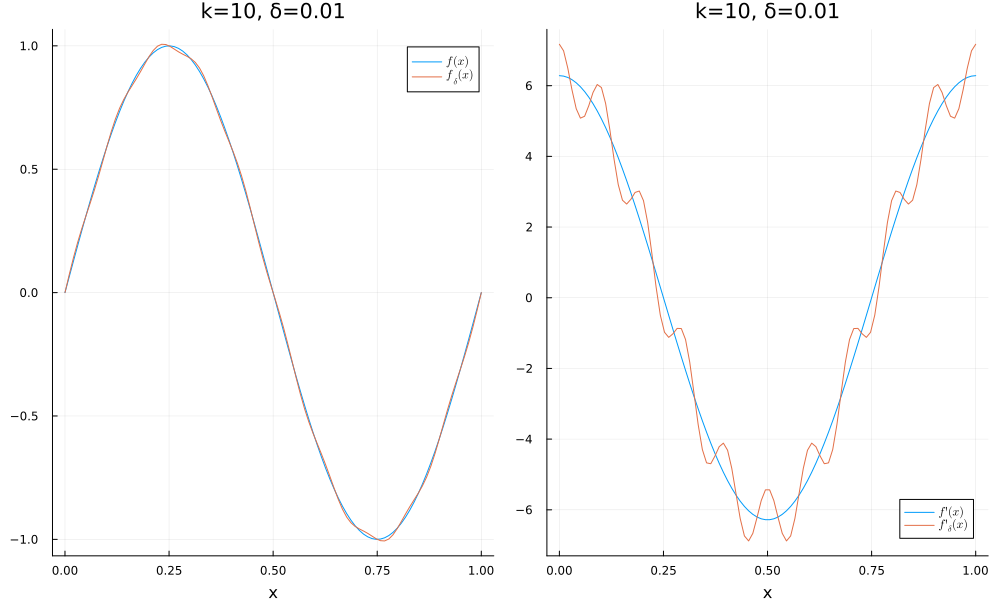

In [7]:
δ = .01
k = 10

p1 = plot(x,f.(x),label=L"f(x)")
plot!(x,fδ.(x,δ,k),label=L"f_{\delta}(x)")

p2 = plot(x,dfdx.(x),label=L"f'(x)")
plot!(x,dfδdx.(x,δ,k),label = L"f'_{\delta}(x)")

plot(p1,p2, layout = (1,2), size = (1000,600))
title!("k=$(k), δ=$(δ)")
xlabel!("x")

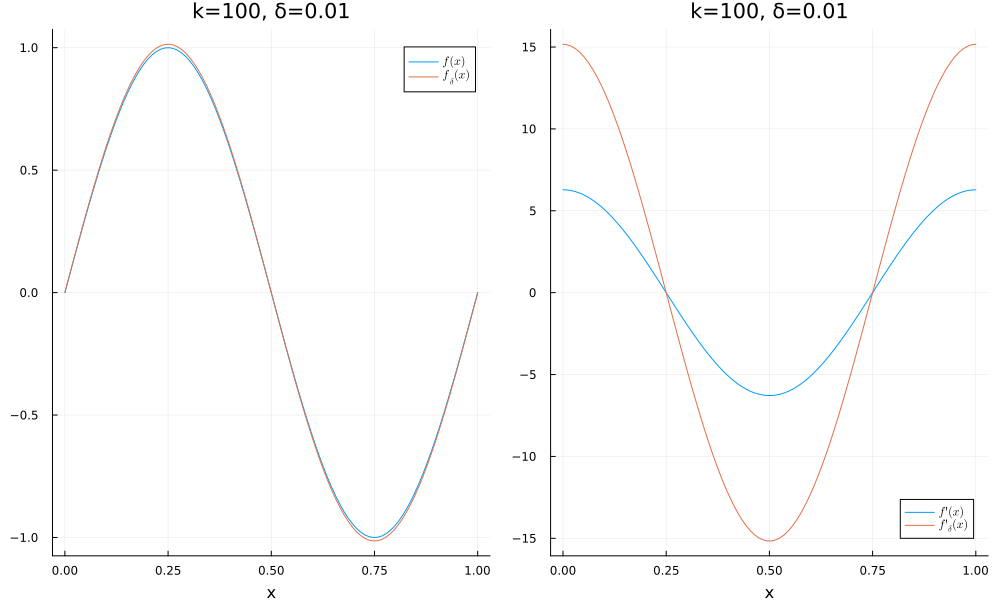

In [8]:
δ = .01
k = 100

p1 = plot(x,f.(x),label=L"f(x)")
plot!(x,fδ.(x,δ,k),label=L"f_{\delta}(x)")

p2 = plot(x,dfdx.(x),label=L"f'(x)")
plot!(x,dfδdx.(x,δ,k),label = L"f'_{\delta}(x)")

plot(p1,p2, layout = (1,2), size = (1000,600))
title!("k=$(k), δ=$(δ)")
xlabel!("x")

a) Compute the $L^2$ norm

We have that

$$ || f_{\delta} - f ||_{L^2}^2 = \int_{0}^{1}|\sqrt{2}\delta sin(2k\pi x)|^2dx $$

$$ = 4k\delta^2 \int_{0}^{1/2k} sin^2(2\pi k x)dx $$

$$ = 4k\delta^2 \int_{0}^{1/2k}\frac{(1-2cos(4\pi kx))}{2}dx = \delta^2$$

We have now that 

$$ || f_{\delta}^{\prime} - f^{\prime} ||_{L^2}^2 = \int_{0}^{1} |n'_{\delta}(x)|^2 dx $$

$$ = \int_{0}^{1} (2\pi k\sqrt{2}\delta)^2 cos^2(2\pi k x) dx = \frac{(2\pi k \sqrt{2}\delta)^2}{2}$$

b) Compute the $L^{\infty}$ norm

$$|| f_{\delta} - f ||_{L^{\infty}} = sup_{x\in[0,1]} \sqrt{2}\delta sin(2k\pi x) = \sqrt{2} k$$

$$|| f'_{\delta} - f' ||_{L^{\infty}} = sup_{x\in[0,1]} 2\pi k \sqrt{2}\delta cos(2k\pi x) = 2\pi k \sqrt{2}\delta$$

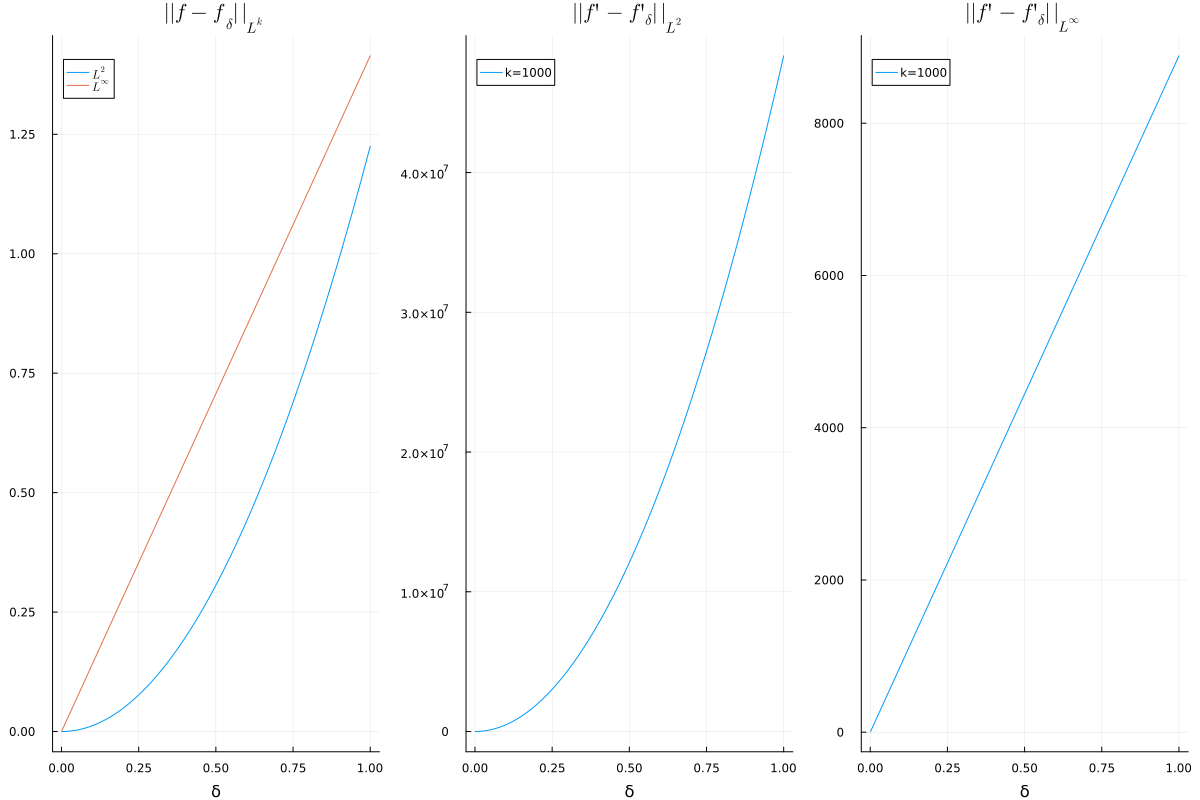

In [16]:
δ_ = range(0.001,1,100)
k = 1000

diff_f_L2(δ) = sqrt(quadgk(x -> abs2(f(x) - fδ(x,δ,k))^2, 0, 1)[1])
diff_f_Linft(δ) = maximum(f.(range(0,1,1000)).-fδ.(range(0,1,1000),δ,k))

diff_df_L2(δ) = sqrt(quadgk(x -> abs2(dfdx(x) - dfδdx(x,δ,k))^2, 0, 1)[1])
diff_df_Linft(δ) = maximum(dfdx.(range(0,1,1000)).-dfδdx.(range(0,1,1000),δ,k))


plot1 = plot(δ_,diff_f_L2.(δ_),label=L"L^2",size=(1000,800),title=L"|| f-f_{δ}||_{L^k}")
plot!(δ_,diff_f_Linft.(δ_),label=L"L^{∞}")

plot2 = plot(δ_ , diff_df_L2.(δ_),title=L"|| f'-f'_{δ}||_{L^2}",label="k=$(k)")

plot3 = plot(δ_,diff_df_Linft.(δ_),title=L"|| f'-f'_{δ}||_{L^∞}",label="k=$(k)")

plot(plot1,plot2,plot3,layout=(1,3),size=(1200,800),xlabel="δ")

d) The Euler's derivative is given by

$$ E'[f](x) = \frac{f(x+h) - f(x-h)}{2h}$$

We have that

$$ E'[f](x) = \frac{sin(x+h) - sin(x-h)}{2h} = \frac{sin(2\pi h)cos(2\pi x)}{h} $$

In the $L^{\infty}$ norm we have

$$ || E'[f](x) - f'(x) || = sup_{x\in [0,1]} |cos(2\pi x)[\frac{sin(2\pi h)}{h} - 2\pi] | = 2\pi - \frac{sin(2\pi h)}{h} $$

Also. we have

$$ E'[f_\delta](x) = \frac{f_\delta (x+h) - f_\delta(x-h)}{2h} = \frac{sin(2\pi h)cos(2\pi x)}{h} + \frac{\sqrt{2}\delta sin(2\pi kh)cos(2\pi kx)}{h}$$

In the $L^{\infty}$ norm we have

$$ || E'[f_\delta](x) - f'_{\delta}(x) || = sup_{x\in [0,1]} |cos(2\pi x)[\frac{sin(2\pi h)}{h} - 2\pi] + cos(2\pi kx)[\frac{\sqrt{2}\delta sin(2\pi kh)}{h} - 2\pi k \sqrt{2}\delta]|$$

$$ = 2\pi k \sqrt{2}\delta - \frac{\sqrt{2}\delta sin(2\pi kh)}{h}$$

In [10]:
function Euler_f(x,h)
    return (f(x+h) - f(x-h)) / (2*h)
end

function Euler_fδ(x,h,k)
    return (fδ(x+h,δ,k) - fδ(x-h,δ,k)) / (2*h)
end

function Error1(h)
    return 2*π - sin(2*π*h) / h
end
function Error2(k,δ,h)
    return 2*π*k*√2*δ - (√2*δ*sin(2*π*k*h))/h
end

Error2 (generic function with 1 method)

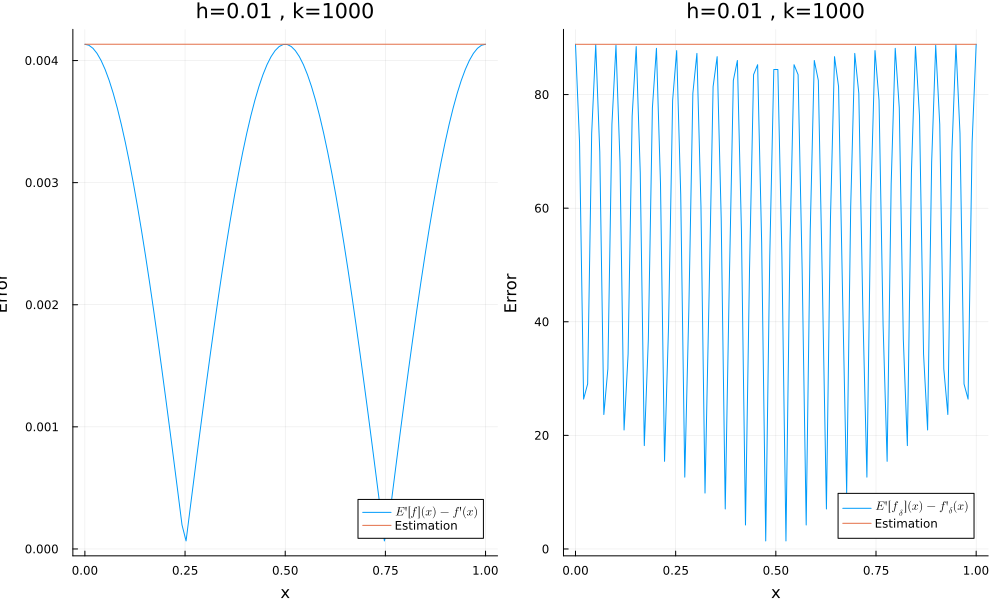

In [11]:
N = 100
h = (1-0) / N
x = range(0,1,N)
plot1 = plot(x,abs.(dfdx.(x) .- Euler_f.(x,h)) , title = "h=$(h) , k=$(k)" , label = L"E'[f](x) - f'(x)")
plot!(x, Error1(h) .* ones(N) , label = "Estimation")

plot2 = plot(x,abs.(dfδdx.(x,δ,k) .- Euler_fδ.(x,h,k)) , title = "h=$(h) , k=$(k)" , label = L"E'[f_{δ}](x) - f'_{δ}(x)" )
plot!(x, Error2(k,δ,h).* ones(N) , label = "Estimation")

plot(plot1,plot2,size = (1000,600), xlabel = "x" , ylabel = "Error")

# Exercice III

a) 

We have

$$ u(x) = \int_0^1 K(x,y)f(y)dy $$

where 

$$ K_\sigma(x, y):=\frac{1}{2 \pi \sigma^2} \exp \left(-\frac{|x-y|^2}{2 \sigma^2}\right) $$

The integral can be approximated by

$$ u(x_i) = \sum_{j=0}^{N-1} h K(x_i,y_j) f(y_j) , \quad y_j =  \frac{h(2j+1)}{2}$$

where $w_j = h = \frac{1}{N}$ is the quadrature of the mid-point rule. In a matrix form, we have

$$ A F = U$$

Such that $U = [u(x_0),...,u(x_M)]^T$, $F = [f(y_0),...,f(y_N)]^T$ and $A_{ij} =  h K(x_i,y_j)$

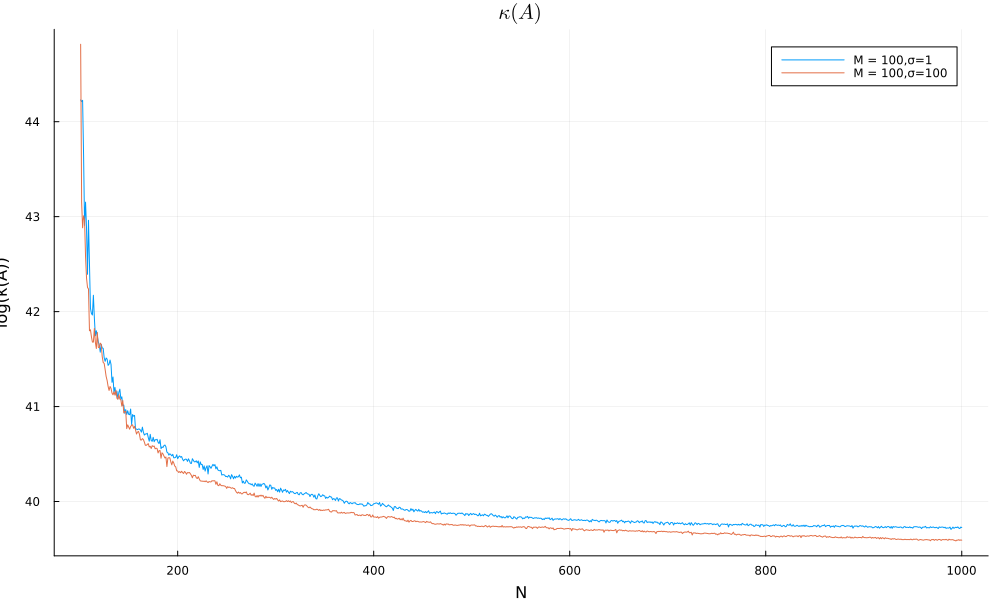

In [12]:
N = 500
M = 100
h = (1-0)/N
σ1 = 1
σ2 = .01
σ3 = 100

function K(x,y,σ)
    return exp(-(x-y)^2 / (2*σ^2)) / (2π*σ^2)
end

function calculate_cond_number_L2(M,N,σ)
    x = range(0,1,M)
    y = [h*(2*j + 1)/2 for j in 1:N-1]
    A = [h*K(i,j,σ) for i in x, j in y]
    return cond(A,2)
end

#calculate_cond_number_L2.(M,M:500,σ)
values = (M+1):1000
plot(values,log.(calculate_cond_number_L2.(M,values,σ1)),title=L"κ(A)",label = "M = $(M),σ=$(σ1)",size=(1000,600))
plot!(values,log.(calculate_cond_number_L2.(M,values,σ3)),title=L"κ(A)",label = "M = $(M),σ=$(σ3)")

xlabel!("N")
ylabel!("log(κ(A))")

By the large values of $\kappa(A)$, the matrix is ill-conditioned!

We have the function $f(x)$

$$f(x)= \begin{cases}1 & x \in[a, b] \\ 0 & x \in[0, a) \cup(b, 1],\end{cases}$$

We can convolve the matrix A to get a blured function

$$ \tilde{u} = Af $$

And recover the information using SVD of A

$$ \tilde{f} = V \Sigma^{-1}_{\sigma_L} U^T \tilde{u}$$

Such that $ \Sigma^{-1}_{\sigma} $ is a truncated matrix of singular values bigger then a given value $\sigma_{L}$ 

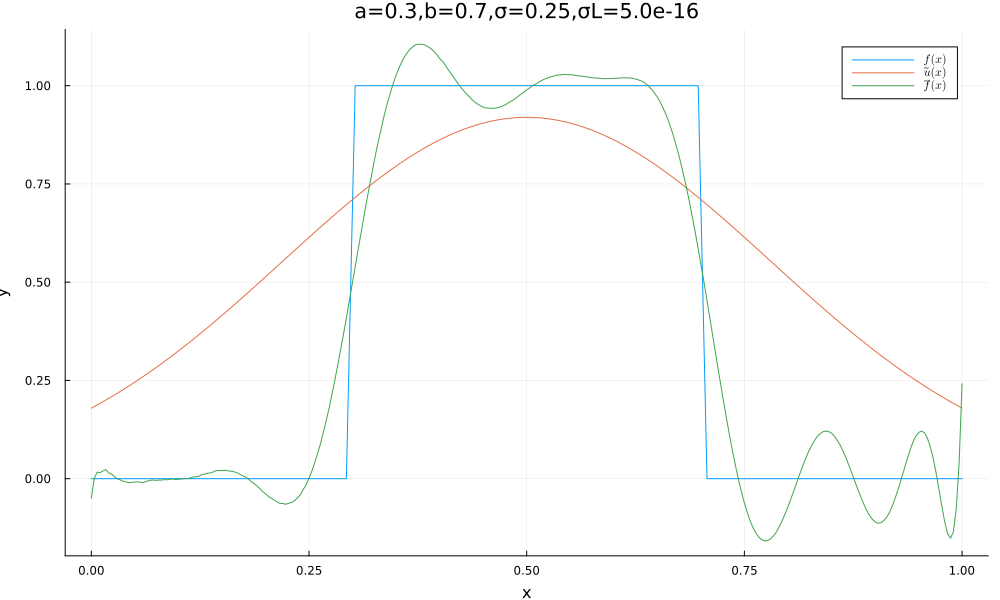

In [13]:
N = 300
M = 100
σ = .25
h = (1-0)/N
σL = 10^(-16) * 5

a = .3
b = .7

function K(x,y,σ)
    return exp(-(x-y)^2 / (2*σ^2)) / (2π*σ^2)
end

function f(x,a,b)
    if( a<= x && x <= b)
        return 1
    else
        return 0
    end
end

x = range(0,1,M)
y = [h*(2*j + 1)/2 for j in 0:N]
A = [h*K(i,j,σ) for i in x, j in y]
F = [f(j,a,b) for j in y]
u_ = A * F

# Perform truncated SVD
U, Σ, V = svd(A)
mask = Σ .>= σL
Σ_trunc = diagm(vcat( 1 ./ Σ[mask] , zeros(length(Σ) - sum(mask)) ))

# Solve for x using truncated SVD
f_ = V * ( Σ_trunc * (U' * u_)) 

plot(x,f.(x,a,b),title="a=$(a),b=$(b),σ=$(σ),σL=$(σL)",label=L"f(x)",size=(1000,600))
plot!(x,u_,label=L"̃u(x)")
plot!(range(0,1,length(f_)),f_,label=L"̃f(x)")
xlabel!("x")
ylabel!("y")

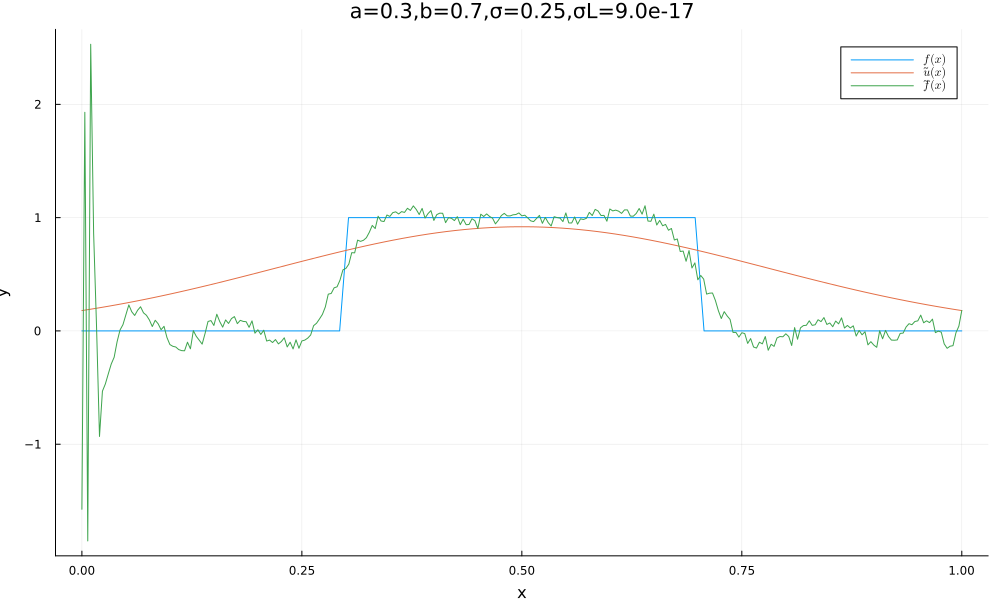

In [14]:
σL = 10^(-16) * .9
# Perform truncated SVD
U, Σ, V = svd(A)
mask = Σ .>= σL
Σ_trunc = diagm(vcat( 1 ./ Σ[mask] , zeros(length(Σ) - sum(mask)) ))

# Solve for x using truncated SVD
f_ = V * ( Σ_trunc * (U' * u_)) 

plot(x,f.(x,a,b),title="a=$(a),b=$(b),σ=$(σ),σL=$(σL)",label=L"f(x)",size=(1000,600))
plot!(x,u_,label=L"̃u(x)")
plot!(range(0,1,length(f_)),f_,label=L"̃f(x)")
xlabel!("x")
ylabel!("y")